In [1]:
# Paths
folder = "../data"  # Folder containing subfolders for 0-9, +, -, times, etc.
output_folder = "single_object_images"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Parameters
image_size = 128  # Output image size (45x45)
num_images = 300  # Number of images to generate

# Utility to randomly sample a file from a folder
def random_sample_file(directory):
    files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    return os.path.join(directory, random.choice(files)) if files else None

# Get all class folders, ignoring .ipynb_checkpoints
class_folders = [
    os.path.join(folder, d)
    for d in os.listdir(folder)
    if os.path.isdir(os.path.join(folder, d)) and d != ".ipynb_checkpoints"
]

def generate_single_object_image(folder, output_size=128):
    # Randomly select a class folder and an image
    class_folders = [
        os.path.join(folder, d)
        for d in os.listdir(folder)
        if os.path.isdir(os.path.join(folder, d)) and d != ".ipynb_checkpoints"
    ]
    selected_folder = random.choice(class_folders)
    file = random_sample_file(selected_folder)
    if file is None:
        raise ValueError(f"No files found in {selected_folder}")

    # Load the image
    symbol = io.imread(file)
    if len(symbol.shape) > 2:  # Convert to grayscale if necessary
        symbol = cv2.cvtColor(symbol, cv2.COLOR_BGR2GRAY)

    # Resize the symbol
    max_symbol_size = output_size // 4  # Ensure the symbol is smaller than the canvas
    symbol = cv2.resize(symbol, (random.randint(30, max_symbol_size),) * 2)

    # Create a blank white image
    blank_image = np.ones((output_size, output_size), dtype=np.uint8) * 255  # White background

    # Place the symbol on the blank image at a random position
    symbol_h, symbol_w = symbol.shape[:2]
    x_offset = random.randint(0, output_size - symbol_w)
    y_offset = random.randint(0, output_size - symbol_h)
    blank_image[y_offset:y_offset + symbol_h, x_offset:x_offset + symbol_w] = symbol

    # Calculate the center of the symbol
    center_x = x_offset + symbol_w // 2
    center_y = y_offset + symbol_h // 2

    return blank_image, (center_x, center_y)


# Generate and save images with correct annotations
annotations = []
for i in range(num_images):
    image, center = generate_single_object_image(folder, output_size=image_size)
    filename = f"object_{str(i).zfill(3)}.png"
    filepath = os.path.join(output_folder, filename)

    # Save the image
    plt.imsave(filepath, image, cmap="gray")
    annotations.append((filename, center[0], center[1]))

# Save annotations to a text file
with open(os.path.join(output_folder, "annotations.txt"), "w") as f:
    for annotation in annotations:
        f.write(f"{annotation[0]},{annotation[1]},{annotation[2]}\n")

print(f"Generated {num_images} single-object images with correct annotations.")



NameError: name 'random' is not defined

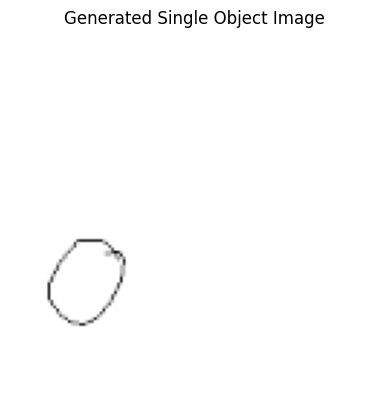

In [2]:
import matplotlib.pyplot as plt
import cv2

# Path to the image you want to visualize
image_path = "single_object_images/object_010.png"  # Replace with your image path

# Load the image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Display the image
plt.imshow(image, cmap="gray")
plt.title("Generated Single Object Image")
plt.axis("off")  # Hide the axes for better visualization
plt.show()


In [3]:
import tensorflow as tf

# model = tf.keras.Sequential([
#     # Input Layer
#     tf.keras.layers.Input(shape=(255, 255, 1)),  # Input: 255x255 grayscale images

#     # Convolutional and Pooling Layers
#     tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D(pool_size=2),  # Reduces spatial size to 22x22

#     tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D(pool_size=2),  # Reduces spatial size to 11x11

#     tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D(pool_size=2),  # Reduces spatial size to 5x5

#     # Flatten and Fully Connected Layers
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),  # Learn complex patterns
#     tf.keras.layers.Dropout(0.5),  # Prevent overfitting
#     tf.keras.layers.Dense(64, activation='relu'),

#     # Output Layer
#     tf.keras.layers.Dense(2)  # Outputs (x, y) coordinates
# ])

# model = tf.keras.Sequential([
#     tf.keras.layers.Input(shape=(64, 64, 1)),  # Adjust input size
#     tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D(pool_size=2),
#     tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D(pool_size=2),
#     tf.keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D(pool_size=2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(2)  # Output: (x, y) coordinates
# ])


# # Compile the model
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#               loss='mse',  # Mean Squared Error for regression
#               metrics=['mae'])  # Mean Absolute Error for interpretability

# model.summary()

import tensorflow as tf

model = tf.keras.Sequential([
    # Input Layer
    tf.keras.layers.Input(shape=(128, 128, 1)),

    # Convolutional and Pooling Layers
    tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=2),  # 128x128 -> 64x64

    tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=2),  # 64x64 -> 32x32

    tf.keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=2),  # 32x32 -> 16x16

    tf.keras.layers.Conv2D(512, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=2),  # 16x16 -> 8x8

    # Flatten Layer
    tf.keras.layers.Flatten(),

    # Fully Connected Layers
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Regularization
    tf.keras.layers.Dense(128, activation='relu'),

    # Output Layer
    tf.keras.layers.Dense(2)  # Output: (x, y) coordinates
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',  # Mean Squared Error for regression
              metrics=['mae'])  # Mean Absolute Error
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,393,474 (70.17 MB)

 Trainable params: 18,393,474 (70.17 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import os

# Load the annotations
annotations_path = "single_object_images/annotations.txt"
data = []
labels = []

with open(annotations_path, "r") as f:
    for line in f:
        filename, x, y = line.strip().split(",")
        image_path = os.path.join("single_object_images", filename)
        image = tf.io.decode_png(tf.io.read_file(image_path), channels=1)  # Grayscale
        image = tf.image.convert_image_dtype(image, tf.float32)  # Normalize to [0, 1]
        data.append(image.numpy())
        labels.append([int(x) / 128, int(y) / 128])  # Normalize centers

# Convert to arrays
data = np.array(data)
labels = np.array(labels)

# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=20, batch_size=32)


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - loss: 1.3849 - mae: 0.8575 - val_loss: 0.0541 - val_mae: 0.2055
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - loss: 0.0608 - mae: 0.2052 - val_loss: 0.0752 - val_mae: 0.2208
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - loss: 0.0669 - mae: 0.2135 - val_loss: 0.0572 - val_mae: 0.2076
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - loss: 0.0585 - mae: 0.2029 - val_loss: 0.0551 - val_mae: 0.2036
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - loss: 0.0569 - mae: 0.1999 - val_loss: 0.0538 - val_mae: 0.2043
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 36s 5s/step - loss: 0.0609 - mae: 0.2046 - val_loss: 0.0564 - val_mae: 0.2084
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - loss: 0.0613 - mae: 0.2126 - val_loss: 0.0541 - val_mae: 0.2036
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - loss: 0.0533 - mae: 0.1941 - val_loss: 0.0562 - val_mae: 0.2004
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 36s 5s/step - loss: 0.0549 - mae: 0.1935 - val_loss:

In [1]:
loss, mae = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}, Mean Absolute Error: {mae}")


NameError: name 'model' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
True Center: [196.  87.]
Predicted Center: [114.57567  87.62304]


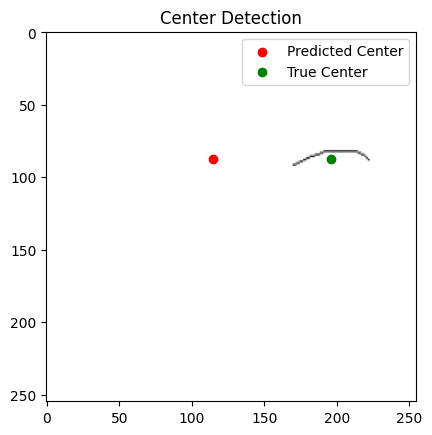

In [92]:
# Test Image and Prediction
test_image = X_val[0]  # Example test image
true_center = y_val[0] * 128  # Denormalize ground truth center
predicted_center = model.predict(test_image[None, ...])[0] * 128  # Denormalize prediction

# Debugging: Print true and predicted centers
print(f"True Center: {true_center}")
print(f"Predicted Center: {predicted_center}")

# Plot the image
plt.imshow(test_image.squeeze(), cmap="gray")
plt.scatter(predicted_center[0], predicted_center[1], c="red", label="Predicted Center")
plt.scatter(true_center[0], true_center[1], c="green", label="True Center")
plt.legend()
plt.title("Center Detection")
plt.show()


In [93]:
print(f"Predicted Center: {predicted_center}")
print(f"True Center: {true_center}")


Predicted Center: [114.57567  87.62304]
True Center: [196.  87.]


In [84]:
test_image = X_val[0]  # Example test image
predicted_center = model.predict(test_image[None, ...])  # Add batch dimension
predicted_center = predicted_center[0] * 128  # Denormalize

print(f"Predicted center: {predicted_center}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Predicted center: [114.57567  87.62304]


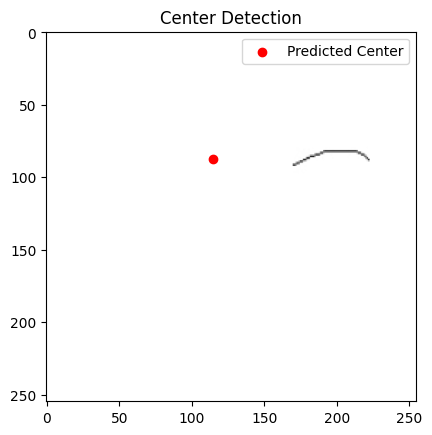

In [85]:
import matplotlib.pyplot as plt

# Display the test image
plt.imshow(test_image.squeeze(), cmap="gray")
plt.scatter(predicted_center[0], predicted_center[1], c="red", label="Predicted Center")
plt.legend()
plt.title("Center Detection")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


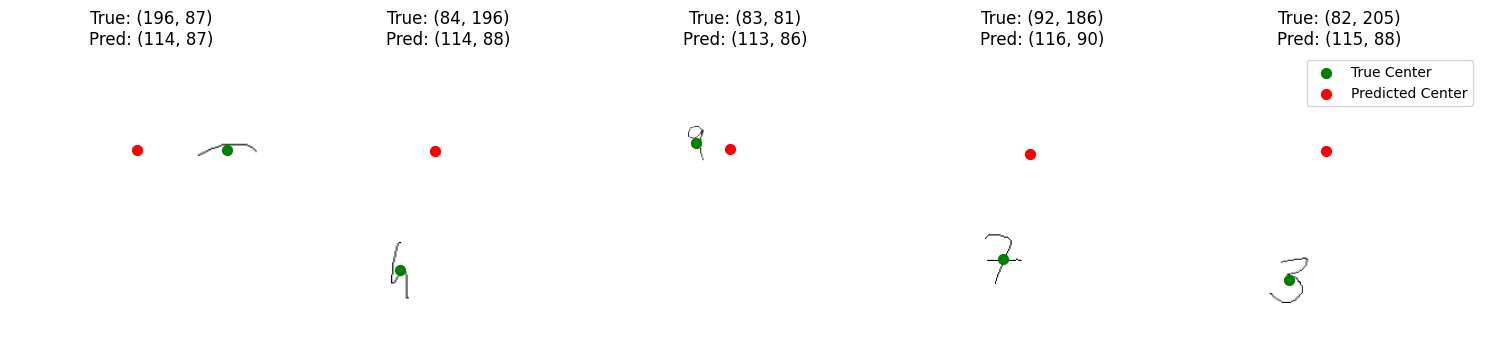

In [88]:
import matplotlib.pyplot as plt

# Function to display predictions for a batch of test images
def visualize_predictions(model, test_images, test_labels, num_samples=5, image_size=128):
    """
    Visualize predictions for a few test images.
    Args:
    - model: Trained model for prediction.
    - test_images: Array of test images.
    - test_labels: Ground truth centers for test images (normalized).
    - num_samples: Number of test images to visualize.
    - image_size: Size of the input images (for denormalizing).
    """
    # Select a few samples to display
    indices = np.random.choice(len(test_images), num_samples, replace=False)
    selected_images = test_images[indices]
    selected_labels = test_labels[indices]

    # Predict centers
    predictions = model.predict(selected_images)

    # Plot the results
    plt.figure(figsize=(15, 5))
    for i, (image, true_label, pred_label) in enumerate(zip(selected_images, selected_labels, predictions)):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image.squeeze(), cmap="gray")
        
        # Denormalize true and predicted labels
        true_x, true_y = true_label * image_size
        pred_x, pred_y = pred_label * image_size
        
        # Plot true and predicted centers
        plt.scatter(true_x, true_y, color="green", label="True Center", s=50)
        plt.scatter(pred_x, pred_y, color="red", label="Predicted Center", s=50)
        plt.title(f"True: ({int(true_x)}, {int(true_y)})\nPred: ({int(pred_x)}, {int(pred_y)})")
        plt.axis("off")
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

# Example: Visualize 5 predictions
visualize_predictions(model, X_val, y_val, num_samples=5)


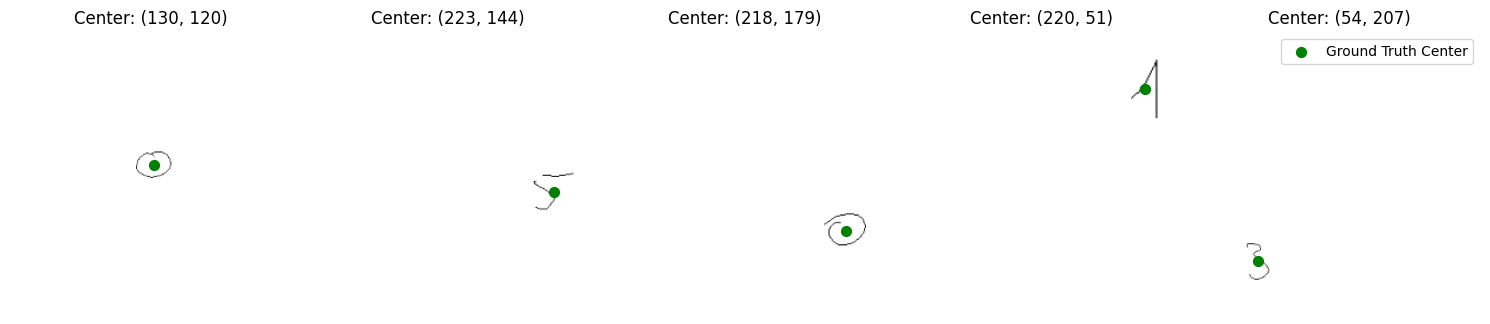

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize test data with ground truth centers
def visualize_test_data(images, labels, num_samples=5, image_size=128):
    """
    Visualizes test images and their ground truth centers.
    Args:
    - images: Array of test images.
    - labels: Ground truth centers (normalized).
    - num_samples: Number of test images to visualize.
    - image_size: Size of the input images (to denormalize labels).
    """
    # Select random samples
    indices = np.random.choice(len(images), num_samples, replace=False)
    selected_images = images[indices]
    selected_labels = labels[indices]

    # Plot the selected images
    plt.figure(figsize=(15, 5))
    for i, (image, label) in enumerate(zip(selected_images, selected_labels)):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image.squeeze(), cmap="gray")
        
        # Denormalize the label coordinates
        x, y = label * image_size
        plt.scatter(x, y, color="green", label="Ground Truth Center", s=50)
        
        plt.title(f"Center: ({int(x)}, {int(y)})")
        plt.axis("off")
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

# Example usage with your dataset
visualize_test_data(X_val, y_val, num_samples=5)


In [61]:
# Function to generate single-object images
def generate_single_object_image(folder, output_size=128):
    # Randomly select a class folder and an image
    class_folders = [
        os.path.join(folder, d)
        for d in os.listdir(folder)
        if os.path.isdir(os.path.join(folder, d)) and d != ".ipynb_checkpoints"
    ]
    selected_folder = random.choice(class_folders)
    file = random_sample_file(selected_folder)
    if file is None:
        raise ValueError(f"No files found in {selected_folder}")

    # Load the image
    symbol = io.imread(file)  # Assuming images are grayscale (45x45)
    if len(symbol.shape) > 2:  # Convert to grayscale if necessary
        symbol = cv2.cvtColor(symbol, cv2.COLOR_BGR2GRAY)

    # Resize the symbol (optional, for random scaling)
    max_symbol_size = output_size // 2
    symbol = cv2.resize(symbol, (random.randint(15, max_symbol_size),) * 2)

    # Create a blank white image
    blank_image = np.ones((output_size, output_size), dtype=np.uint8) * 128  # White background

    # Randomly rotate the symbol
    angle = random.randint(0, 360)
    center = (symbol.shape[1] // 2, symbol.shape[0] // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_symbol = cv2.warpAffine(symbol, rotation_matrix, (symbol.shape[1], symbol.shape[0]), borderValue=128)

    # Place the rotated symbol on the blank image
    symbol_h, symbol_w = rotated_symbol.shape[:2]
    x_offset = random.randint(0, output_size - symbol_w)
    y_offset = random.randint(0, output_size - symbol_h)
    blank_image[y_offset:y_offset + symbol_h, x_offset:x_offset + symbol_w] = rotated_symbol

    # Calculate the true center of the symbol on the blank image
    center_x = x_offset + symbol_w // 2
    center_y = y_offset + symbol_h // 2

    return blank_image, (center_x, center_y)

# Generate and save images with correct annotations
annotations = []
for i in range(num_images):
    image, center = generate_single_object_image(folder, output_size=image_size)
    filename = f"object_{str(i).zfill(3)}.png"
    filepath = os.path.join(output_folder, filename)

    # Save the image
    plt.imsave(filepath, image, cmap="gray")
    annotations.append((filename, center[0], center[1]))

# Save annotations to a text file
with open(os.path.join(output_folder, "annotations.txt"), "w") as f:
    for annotation in annotations:
        f.write(f"{annotation[0]},{annotation[1]},{annotation[2]}\n")

print(f"Generated {num_images} single-object images with correct annotations.")


FileNotFoundError: [Errno 2] No such file or directory: '/home/ayyildi1/CMSE492Project/cmse492_project/notebooks/single_object_images/object_000.png'

In [89]:
predicted_center = predicted_center[0] * test_image.shape[0]  # Scale back to actual image size


In [90]:
predicted_center

29216.79542541504